# Unspervised Learning - Using Decision Tree to Classify into Groups
State notebook purpose here

### Imports
Import libraries and write settings here.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [52]:
"""Making 5D Cluster"""
# 5D Cluster, it's hard to know what's up when the demension gets bigger.
C2 = [[1, 1, -1, -1, 1], [-1, -1, 1, 1, 0], [1, -1, 0, 1, 1]] 
# Understand every part of make blobs. 
# The standard deviation changes the spread of you data.
# Quiz: Supposed someone stay up all night to get 1.0 on a specific data, what's wrong? - It's overfitting.
X2, y2 = make_blobs(n_samples=100, centers=C2, cluster_std=.2, random_state=0) 

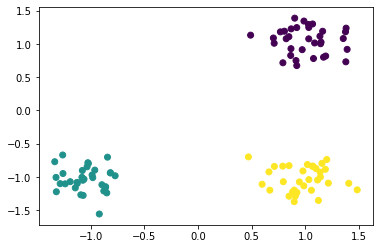

In [53]:
# 0th, and 4th overlap, and not seperated. 0th and 1th demension do not overlap.
# y2 is blob index (np array)
plt.scatter(X2[:, 0], X2[:, 1], c=y2); 

### Classifying with Decision Tree

In [54]:
"""Code used to check what color is associated with which color."""
num_correct = 0
for i, row in enumerate(X2[:, 0:2]): # i is the index and row is the context.
#     print(i, row, y2[i])
    predict = -1
    if row[0] < -.19:
        prediction = 1
    elif row[1] < -.27:
        prediction = 2
    else:
        prediction = 0
    
    if prediction == y2[i]:
        num_correct += 1
        
print("Accuracy", num_correct/len(y2))

Accuracy 1.0


### Changing the Demesion and Clustering Using DBSCAN (unsupervised learning)

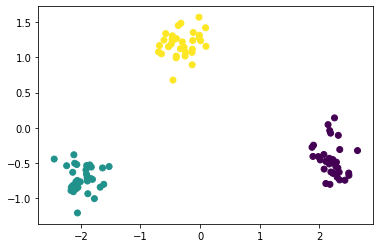

In [70]:
"""Princpal Component Analysis."""
# Changing five demsions to two demesions. 
proj_pca = PCA(n_components=2).fit_transform(X2) 
plt.scatter(proj_pca[:, 0], proj_pca[:, 1], c=y2); # Notice we change X2 to proj_pca

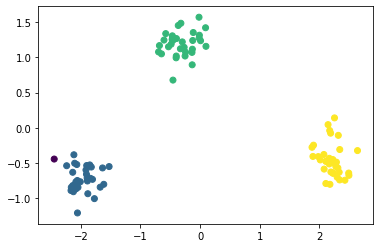

In [69]:
"""Unsperviesed Machine Learning - DBSCAN."""
# Using DBSCAN (unspervised algorithm) to cluter the groups. We see that it failed for a point.
db =  DBSCAN().fit(X2) 
plt.scatter(proj_pca[:, 0], proj_pca[:, 1], c=db.labels_); # Notice we change c=y2 to c=db.labels_